># Técnicas e Algoritmos em Ciência de Dados 
>## Assessed Coursework 2
Tarla Lemos de Andrade

 # Part 1 – Backpropagation

Download the file “Part1.tsv” from the ECLASS platform. In this part, you will build a neural
network with a specific architecture and train it with the backpropagation algorithm that you
will implement. 

Here are the steps that you will need to implement:

a) Load the data into a pandas DataFrame, and get a scikit-learn compatible dataset.

In [1]:
import pandas as pd
import numpy as np
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [74]:
df = pd.read_csv("Part 1.tsv",sep='\t')

y = df["label"].values
X = df.iloc[:,df.columns != 'label'].values

b) Make a 70%/30% split of the dataset for training and testing respectively.

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

c) Using numpy, implement the neural network architecture from Figure 1. Note that $\sigma$
denotes the sigmoid function, tanh denotes the hyperbolic tangent and the vertical
(single) arrows denote the bias term. You will need to implement the backpropagation
algorithm to learn the weights of this network by gradient descent, that is:

* The forward pass
* The backward pass
* Weight updates

Note: your implementation must rely on numpy only, and it must not use any
specialized framework for backpropagation. In other words, your code should
look something similar to the one we saw in the backpropagation lab.

In [76]:
def sigmoid(Z):
    return 1.0 / (1.0 + np.exp(-Z))

def sigmoid_derivative(output):
    return output * (1.0 - output)

def tanh_derivative(output):
    return ((np.cosh(output))**2 - (np.sinh(output))**2)/(np.cosh(output))**2

def cost_function(y, y_hat):
    return -np.sum(y*(np.log(y_hat)) + (1 - y)*np.log(1 - y_hat)) / y.shape[0]

def cost_gradient(y, y_hat):
    return -np.divide(y, y_hat) + np.divide(1.0 - y, 1.0 - y_hat)

In [77]:
def train_myNetwork(X_train, y_train):
    epochs = 100
    lr = 0.01

    # W1 connects first two inputs to the hidden layer
    W1 = np.random.random((1, 2 + 1)) # bias term integrated
    # W2 connects the 2 last input to output layer
    W2 = np.random.random((1, 2 + 1))
    # W3 connects hidden layer to output layer
    W3 = np.random.random((1, 1 + 1))
    
    losses = []

    for epoch in range(epochs):
        epoch_losses = []
        
        for x_i, y_i in zip(X_train, y_train): 
           
            x_i = x_i.reshape(1, -1)
            y_i = y_i.reshape(1, -1)

            
            #FORWARD PASS
            # first two inputs and bias term
            A0_1_2 = np.hstack([x_i[:, 0:2], np.ones((x_i.shape[0],1))]).T 
                        
            Z1 = W1 @ A0_1_2 #linear transformation of the two first inputs
            A1 = np.tanh(Z1) #non-linear transformation 
            A1 = np.vstack([A1, np.ones((1, A1.shape[1]))])
            
            A0_3_4 = np.hstack([x_i[:, 2:4], np.ones((x_i.shape[0],1))]).T 
            Z2_1 = W2 @ A0_3_4 #linear transformation of the two last inputs
            Z2_2 = W3 @ A1 #linear transformation of the hidden layer
            Z2 = Z2_1+Z2_2
            
            A2 = sigmoid(Z2)

            #BACKWARD PASS
            dA2 = cost_gradient(y_i, A2) 
            
            dZ2 = dA2 * sigmoid_derivative(sigmoid(Z2)) 
            dW3 = dZ2 @ A2.T
            
            dA1 = W3[:,:-1].T @ dZ2
            dZ1 = dA1 * tanh_derivative(np.tanh(Z1))
            dW1 = dZ1 @ A0_1_2.T
            
            dW2 = dZ2 @ A0_3_4.T
            
            # UPDATE WEIGHTS
            W1 -= lr * dW1
            W2 -= lr * dW2
            W2 -= lr * dW3
            
            #error
            epoch_losses.append(cost_function(y_i, A2))
            
        losses.append(np.mean(epoch_losses))
        
    return ((W1,W2,W3),losses)
               

In [78]:
def predict(network,X_test):
    W1 = network[0]
    W2 = network[1]
    W3 = network[2]
    
    pred = []
    prob = []
    for x_i in X_test:
        x = x_i.reshape(1, -1)
        
        A0_1_2 = np.hstack([x[:, 0:2], np.ones((1,1))]).T 
                        
        Z1 = W1 @ A0_1_2 
        A1 = np.tanh(Z1) 
        A1 = np.vstack([A1, np.ones((1, A1.shape[1]))])
            
        A0_3_4 = np.hstack([x[:, 2:4], np.ones((x.shape[0],1))]).T 
        Z2_1 = W2 @ A0_3_4 
        Z2_2 = W3 @ A1 
        Z2 = Z2_1+Z2_2
            
        A2 = sigmoid(Z2)
       
        y_pred = A2.squeeze().round()
        pred.append(y_pred)
        prob.append([0,1] if y_pred==1.0 else [1,0])
        
    return (pred, prob)       

d) Evaluate the trained model on your test set using the following:
* Accuracy
* AUC-PR
* AUC-ROC
* printing the confusion matrix

Note: In this step, you can use scikit-learn tools, no need to implement these

In [79]:
#Accuracy
network, loss = train_myNetwork(X_train, y_train)

y_pred, prob = predict(network,X_train)
acc = accuracy_score(y_train, y_pred)
print(f'training accuracy {acc:.3f}')

y_pred, prob = predict(network, X_test)
acc = accuracy_score(y_test, y_pred)
print(f'testing accuracy {acc:.3f}')

training accuracy 0.837
testing accuracy 0.839


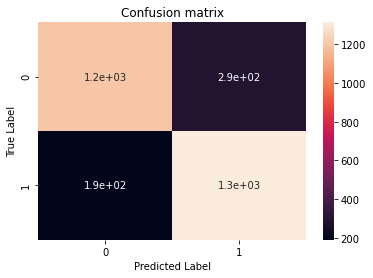

In [80]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(cm, annot=True)
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label')
plt.title("Confusion matrix")
plt.show()


C:\Users\tarla\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


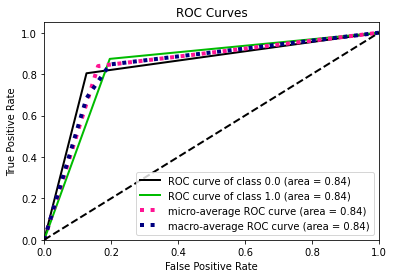

In [81]:
# AUC_ROC
y_true = y_test 
y_probas = prob
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.show()

C:\Users\tarla\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


<AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

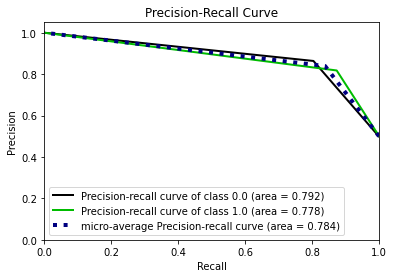

In [82]:
# AUC_PR
skplt.metrics.plot_precision_recall_curve(y_true, y_probas)

e) During each epoch of training, collect the value of the error, and make a plot with the
epoch number in the X axis, and the error on the Y axis.


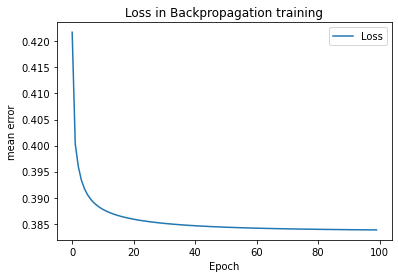

In [83]:
fig, ax = plt.subplots(figsize=(6,4))
sns.lineplot(x=range(len(loss)), y=loss, ax=ax, label='Loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('mean error')
plt.title("Loss in Backpropagation training")
plt.show()

# Part 2 – Bootstrap aggregation

Download the Census Income dataset (https://archive.ics.uci.edu/ml/datasets/Adult). In this
part, you will build a bagged trees model for classification.

Here are the steps that you will need to implement:

a) Load the data into a pandas DataFrame, and get a scikit-learn compatible dataset.

In [20]:
df2 = pd.read_csv('adult.data',header=None)
X = df2.iloc[:,:-1].values
y = df2.iloc[:,-1].values

In [21]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


b) Make a 70%/30% split of the dataset for training and testing respectively

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#X_train = X_train[:30,:]
#y_train = y_train[:30]

c) Implement a bagged trees model. The model should have:

* A parameter $B$, to decide on the number of bootstrapped training sets.
* Parameters for controlling the growth of trees. You need to implement at least two of the following:
     - Maximum level (or depth) of the tree
     - Minimum number of observations in a node
     - The proportion of classes in the node

In [5]:
def gini_index(region):
    """
    Implements the gini index over the classes in a region
    
    Parameters
    ----------
    region : array (1D)
        array of labels assigned to points in this region
        
    Returns
    -------
    float
        the Gini Index
    """
    classes = np.unique(region)
    N = region.shape[0]
    gini = 0
    for c in classes:
        p = (region == c).sum() / N
        gini += p*(1-p)
    return gini

In [6]:
def split_region_numerical(region, feature_index, tau):
    """
    Given a region, splits it based on the feature indicated by
    `feature_index`, the region will be split in two, where
    one side will contain all points with the feature with values 
    lower than `tau`, and the other split will contain the 
    remaining datapoints.
    
    Parameters
    ----------
    region : array of size (n_samples, n_features)
        a partition of the dataset (or the full dataset) to be split
    feature_index : int
        the index of the feature used to make this partition
    tau : float
        The threshold used to make this partition
        
    Return
    ------
    low_partition : array
        indices of the datapoints in `region` where feature < `tau`
    high_partition : array
        indices of the datapoints in `region` where feature < `tau` 
    """
    return np.where(region[:, feature_index] < tau)[0], np.where(region[:, feature_index] >= tau)[0]

def split_region_nominal(region, feature_index, tau):
    """
    Given a region, splits it based on the feature indicated by
    `feature_index`, the region will be split in two, where
    one side will contain all points with the feature with values 
    equal `tau`, and the other split will contain the 
    remaining datapoints.
    
    Parameters
    ----------
    region : array of size (n_samples, n_features)
        a partition of the dataset (or the full dataset) to be split
    feature_index : int
        the index of the feature used to make this partition
    tau : string
        The parameter used to make this partition
        
    Return
    ------
    low_partition : array
        indices of the datapoints in `region` where feature = `tau`
    high_partition : array
        indices of the datapoints in `region` where feature != `tau` 
    """
    return np.where(region[:, feature_index] == tau)[0], np.where(region[:, feature_index] != tau)[0]

In [7]:
def get_split(X, y):
    """
    Given a dataset (full or partial), splits it on the feature of that minimizes the Gini Index
    
    Parameters
    ----------
    X : array (n_samples, n_features)
        features 
    y : array (n_samples, )
        labels
    
    Returns
    -------
    decision : dictionary
        keys are:
        * 'feature_index' -> an integer that indicates the feature of `X` on which the data is split
        * 'tau' -> the threshold used to make the split
        * 'low_region' -> array of indices where the `feature_index`th feature of X is lower than `tau`
        * 'high_region' -> indices not in `low_region`
    """
    best_gini = np.Inf 
    best_feature_index = None
    best_tau = None
    best_lo = None
    best_hi = None
    
    for feature_index in range(X.shape[1]):
        for tau in np.unique(X[:, feature_index]): 
            if tau is str:
                lo, hi = split_region_nominal(X, feature_index, tau)
                if len(lo)!=0:
                    gini = gini_index(y[lo]) + gini_index(y[hi])
                    if gini < best_gini:
                        best_gini = gini
                        best_feature_index = feature_index
                        best_tau = tau
                        best_lo = lo
                        best_hi = hi
            else:
                lo, hi = split_region_numerical(X, feature_index, tau)
                if len(lo)!=0:
                    gini = gini_index(y[lo]) + gini_index(y[hi])
                    if gini < best_gini:
                        best_gini = gini
                        best_feature_index = feature_index
                        best_tau = tau
                        best_lo = lo
                        best_hi = hi
        
    return {
        'feature_index': best_feature_index,
        'tau': best_tau,
        'low_region' : best_lo,
        'high_region' : best_hi,
    }

In [8]:
def recursive_growth(node, min_samples, max_depth, current_depth, max_gini, X, y):
    """
    Recursively grows a decision tree.
    
    Parameters
    ----------
    node : dictionary
        If the node is terminal, it contains only the "class" key, which determines the value to be used as a prediction.
        If the node is not terminal, the dictionary has the structure defined by `get_split`
    min_samples : int
        parameter for stopping criterion
    max_depth : int
        parameter for stopping criterion
    depth : int
        current distance from the root
    max_gini: int
        parameter for stopping criterion (The proportion of classes in the node)
    X : array (n_samples, n_features)
        features (full dataset)
    y : array (n_samples, )
        labels (full dataset)
    
    Notes
    -----
    To create a terminal node, a dictionary is created with a single "class" key, and a value that is
    the class to which the majority of the datapoins in the node belong.
    
    'left' and 'right' keys are added to non-terminal nodes, which contain (possibly terminal) nodes 
    from higher levels of the tree:
    'left' corresponds to the 'low_region' key, and 'right' to the 'high_region' key
    """
    if 'low_region' in node.keys(): # not a terminal node
        lo = node['low_region']
        hi = node['high_region']
       
        # process left
        if len(lo) < min_samples or current_depth == max_depth or gini_index(y[lo])<max_gini:
            classes, counts = np.unique(y[lo], return_counts=True)
            node['left'] = {'class':classes[np.argmax(counts)]}
        else:
            node['left'] = get_split(X[lo], y[lo])
            recursive_growth(node['left'], min_samples, max_depth, current_depth + 1,max_gini, X, y)

        # process right
        if len(hi) < min_samples or current_depth == max_depth or gini_index(y[hi])<max_gini:
            classes, counts = np.unique(y[hi], return_counts=True)
            node['right'] = {'class':classes[np.argmax(counts)]}
        else:
            node['right'] = get_split(X[hi], y[hi])
            recursive_growth(node['right'], min_samples, max_depth, current_depth + 1, max_gini, X, y)
            

In [9]:
def bootstrap(X, y, B, bp): #X_train,y_train
    """
    Given a dataset creates B Bootstrap samples
    
    Parameters
    ----------
    X : array (n_samples, n_features)
        features 
    y : array (n_samples, )
        labels
    B : int
        parameter (number of sample dataset)
    bp: float
        parameter (proportion of the dataset in each sample dataset)
    
    Returns
    -------
    b_X_samples : list of arrays of size (n_samples,n_datapoints, n_features
    )
        list with all samples generated
    b_y_samples : list
        list with all targets of the samples generated
    """
    b_X_samples = []
    b_y_samples = []
    n = int(np.floor(y.shape[0]*bp))
    
    for i in range(B):
        index = np.random.randint(y.shape[0], size=n)
        b_X_samples.append(X[index,:])
        b_y_samples.append(y[index])
        
    return b_X_samples,b_y_samples 

In [10]:
def predict_sample(node, sample):
    """
    Makes a prediction based on the decision tree defined by `node`
    
    Parameters
    ----------
    node : dictionary
        A node created one of the methods above
    sample : array of size (n_features,)
        a sample datapoint
    """
    if 'class' in node.keys():
        return node['class']
    if (sample[node['feature_index']] is not str) and (sample[node['feature_index']] < node['tau']):
        return predict_sample(node['left'], sample)
    if (sample[node['feature_index']] is str) and (sample[node['feature_index']]==node['tau']):
        return predict_sample(node['left'], sample)
    return predict_sample(node['right'], sample)
        
def predict(node, X):
    """
    Makes a prediction based on the decision tree defined by `node`
    
    Parameters
    ----------
    node : dictionary
        A node created one of the methods above
    X : array of size (n_samples, n_features)
        n_samples predictions will be made
    """
    prediction = []
    for i  in range(X.shape[0]):
        prediction.append(predict_sample(node, X[i,:]))
    return prediction

In [11]:
def training_bagging(X, y, B, bp, min_samples, max_depth, max_gini):
    """
    Train the bagging model (generate roots for each tree)
    
    Parameters
    ----------
    X_train : array of size (n_samples, n_features)
        features
    y_train : array
        labels
    samples : array of size (n_samples, n_features)
        samples sampled from bootstrap
        
    """
    # Bootstrapping
    b_X_samples,b_y_samples = bootstrap(X, y, B, bp)
    print("Bootstrapping Bagg ok")
    
    #Generating roots:
    roots = []
    aux = 0
    for x_i,y_i in zip(b_X_samples,b_y_samples):
        root = get_split(x_i, y_i)
        recursive_growth(root, min_samples, max_depth, 1, max_gini, x_i, y_i)
        aux += 1
        print("tree ",aux)
        roots.append(root)
    print("Roots Bagg ok")
    return roots
    

In [12]:
def predict_bagging(roots, X_test, classes_name=[' <=50K',' >50K']):
    """
    Makes the prediction for each decision tree and take the majority vote. 
    
    Parameters
    ----------
    roots : list of dictionary
        nodes for each tree after the bootstrap
    X_test : array 
        features
        
    Return
    ----------
    maj_pred : array
        Majorities prediction among the trees
        
    """
    preds = []
    maj_pred = []
    probs = []
    
    for root in roots:
        preds.append(predict(root, X_test))
    
    for i,pred in enumerate(np.array(preds).transpose()):
        classes, counts = np.unique(pred, return_counts=True)
        maj_pred.append(classes[np.argmax(counts)])
                
        probs_each_class = np.zeros(2) 
        for i in range(len(classes)):
            if classes[i]==classes_name[0]:
                probs_each_class[0] = counts[i]/sum(counts)
            elif classes[i]==classes_name[1]:
                probs_each_class[1] = counts[i]/sum(counts)
        probs.append(probs_each_class)
    
    return np.array(maj_pred),np.array(probs)

# Part 3 – Random Forests 

This part uses the same data you used already in Part 2.
Here, you will implement the Random Forest algorithm, as described in Section 8.2.2 of the
Witten, James, Hastie & Tibshirani book. You should add the following options:

* A parameter $m$ for the number of predictors (or features) to consider at each split
* A parameter to control the number of trees in the forest
* Parameters to control the growth of trees (could be the same as Part 2c)

In [13]:
import random

def get_split_RF(X, y, m):
    """
    Given a dataset (full or partial), splits it on the feature (among m features) of that minimizes the Gini Index
    
    Parameters
    ----------
    X : array (n_samples, n_features)
        features 
    y : array (n_samples, )
        labels
    m : int
        amount of predictor to consider in each split
    
    Returns
    -------
    decision : dictionary
        keys are:
        * 'feature_index' -> an integer that indicates the feature of `X` on which the data is split
        * 'tau' -> the threshold used to make the split
        * 'low_region' -> array of indices where the `feature_index`th feature of X is lower than `tau`
        * 'high_region' -> indices not in `low_region`
    """
    best_gini = np.Inf 
    best_feature_index = None
    best_tau = None
    best_lo = None
    best_hi = None
    
    #select m features
    features_indexes = random.sample(range(X.shape[1]), m)
    
    for feature_index in features_indexes:
        for tau in np.unique(X[:, feature_index]): 
            if tau is str:
                lo, hi = split_region_nominal(X, feature_index, tau)
                if len(lo)!=0:
                    gini = gini_index(y[lo]) + gini_index(y[hi])
                    if gini < best_gini:
                        best_gini = gini
                        best_feature_index = feature_index
                        best_tau = tau
                        best_lo = lo
                        best_hi = hi
                    
            else:
                lo, hi = split_region_numerical(X, feature_index, tau)
                if len(lo)!=0:
                    gini = gini_index(y[lo]) + gini_index(y[hi])
                    
                    if gini < best_gini:
                        best_gini = gini
                        best_feature_index = feature_index
                        best_tau = tau
                        best_lo = lo
                        best_hi = hi
                      
    return {
        'feature_index': best_feature_index,
        'tau': best_tau,
        'low_region' : best_lo,
        'high_region' : best_hi,
    }

In [14]:
def recursive_growth_RF(node, min_samples, max_depth, current_depth, max_gini, X, y, m):
    """
    Recursively grows a decision tree for Random Forest.
    
    Parameters
    ----------
    node : dictionary
        If the node is terminal, it contains only the "class" key, which determines the value to be used as a prediction.
        If the node is not terminal, the dictionary has the structure defined by `get_split`
    min_samples : int
        parameter for stopping criterion
    max_depth : int
        parameter for stopping criterion
    depth : int
        current distance from the root
    max_gini: int
        parameter for stopping criterion (The proportion of classes in the node)
    X : array (n_samples, n_features)
        features (full dataset)
    y : array (n_samples, )
        labels (full dataset)
    
    Notes
    -----
    To create a terminal node, a dictionary is created with a single "class" key, and a value that is
    the class to which the majority of the datapoins in the node belong.
    
    'left' and 'right' keys are added to non-terminal nodes, which contain (possibly terminal) nodes 
    from higher levels of the tree:
    'left' corresponds to the 'low_region' key, and 'right' to the 'high_region' key
    """
    if 'low_region' in node.keys(): # not a terminal node
        lo = node['low_region']
        hi = node['high_region']
       
        # process left
        if len(lo) < min_samples or current_depth == max_depth or gini_index(y[lo])<max_gini:
            classes, counts = np.unique(y[lo], return_counts=True)
            node['left'] = {'class':classes[np.argmax(counts)]}
        else:
            node['left'] = get_split_RF(X[lo], y[lo], m)
            recursive_growth_RF(node['left'], min_samples, max_depth, current_depth + 1,max_gini, X, y, m)

        # process right
        if len(hi) < min_samples or current_depth == max_depth or gini_index(y[hi])<max_gini:
            classes, counts = np.unique(y[hi], return_counts=True)
            node['right'] = {'class':classes[np.argmax(counts)]}
        else:
            node['right'] = get_split_RF(X[hi], y[hi], m)
            recursive_growth_RF(node['right'], min_samples, max_depth, current_depth + 1, max_gini, X, y, m)
            

In [15]:
def training_bagging_RF(X, y, B, bp, min_samples, max_depth, max_gini, m):
    """
    Train the bagging model for Random Forest(generate roots for each tree)
    
    Parameters
    ----------
    X_train : array of size (n_samples, n_features)
        features
    y_train : array
        labels
    samples : array of size (n_samples, n_features)
        samples sampled from bootstrap
        
    """
    # Bootstrap
    b_X_samples,b_y_samples = bootstrap(X, y, B, bp)
    print("Bootstrap RF ok")
    
    #Generating roots:
    roots = []
    aux = 0
    for x_i,y_i in zip(b_X_samples,b_y_samples):
        root = get_split_RF(x_i, y_i, m)
        recursive_growth_RF(root, min_samples, max_depth, 1, max_gini, x_i, y_i, m)
        aux += 1
        print("tree ",aux)
        roots.append(root)
        
    return roots
    

# Part 4 – Performance comparison

This part relies on the models you implemented in Parts 2 and 3.

a) Use functions you implemented in Parts 2 and 3 to build:
    
* A bagged trees scikit-learn estimator
* A random forest scikit-learn estimator

In [16]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal
from sklearn.utils import check_X_y

In [17]:
class BaggedTreesClassifier(BaseEstimator, ClassifierMixin):
    def _init_(self):
        self.classes_ = []
        self.roots = []
        self.B
        self.bp
        self.min_samples
        self.max_depth
        self.max_gini
    
    def fit(self, X, y):
        self.roots = training_bagging(X, y, self.B, self.bp, self.min_samples, self.max_depth, self.max_gini)
        self.classes_ = sorted(np.unique(y))
        return self
    
    
    def predict_proba(self, X):
        preds, probs = predict_bagging(self.roots, X)
        return np.array(probs)
    
    def predict(self, X):
        preds, probs = predict_bagging(self.roots, X)
        return preds
            

In [18]:
class RFClassifier(BaseEstimator, ClassifierMixin):
    def _init_(self):
        self.classes_ = []
        self.roots = []
        self.B
        self.bp
        self.min_samples
        self.max_depth
        self.max_gini
        self.m
    
    def fit(self, X, y):
        self.roots = training_bagging_RF(X, y, self.B, self.bp, self.min_samples, self.max_depth, self.max_gini,self.m)
        self.classes_ = sorted(np.unique(y))
        return self
    
    def predict_proba(self, X):
        preds, probs = predict_bagging(self.roots, X)
        return np.array(probs)
    
    def predict(self, X):
        preds, probs = predict_bagging(self.roots, X)
        return preds
            

In [27]:
bagg = BaggedTreesClassifier()
bagg.B = 15
bagg.bp = 0.05
bagg.min_samples = 10
bagg.max_depth = 10
bagg.max_gini = 0.05


bagg.fit(X_train, y_train)
print("rf.fit ok")
preds_bagg = bagg.predict(X_test)
print("bagg.predict ok")


Bootstrapping Bagg ok
tree  1
tree  2
tree  3
tree  4
tree  5
tree  6
tree  7
tree  8
tree  9
tree  10
tree  11
tree  12
tree  13
tree  14
tree  15
Roots Bagg ok
rf.fit ok
bagg.predict ok


In [28]:
rf = RFClassifier()
rf.B = 15
rf.bp = 0.05
rf.min_samples = 10
rf.max_depth = 10
rf.max_gini = 0.05
rf.m = int(np.floor(np.sqrt(X_train.shape[1])))

rf.fit(X_train, y_train)
print("bagg.fit ok")
preds_rf = rf.predict(X_test)
print("rf.predict ok")

Bootstrap RF ok
tree  1
tree  2
tree  3
tree  4
tree  5
tree  6
tree  7
tree  8
tree  9
tree  10
tree  11
tree  12
tree  13
tree  14
tree  15
bagg.fit ok
rf.predict ok


b) Using the dataset you built in Part 2, train both models, and compare the results using
the following performance metrics:
    
* Precision
* Recall
* AUC-ROC
* AUC-PR

Your code will:
- Print a table with values of the performance metric (in the columns) for each model (in the rows) on the test set.
- Make a single figure containing 2 subplots. In the first subplot, you will plot the ROC curves for each model. In the second subplot, you will plot the PR curves for each model.

In [42]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

p_bagg = precision_score(y_test,preds_bagg,average='macro',zero_division=1)
p_rf = precision_score(y_test,preds_rf,average='macro', zero_division=1)

r_bagg = recall_score(y_test,preds_bagg,average='macro')
r_rf = recall_score(y_test,preds_rf,average='macro')


In [43]:
from rich.console import Console
from rich.table import Table

console = Console()
table = Table(show_header=True, 
              header_style="bold blue")
table.add_column("")
table.add_column("Precision")
table.add_column("Recall")

table.add_row("Bagged Tree",str("%.2f" % round(p_bagg,2)),str("%.2f" % round(r_bagg,2)))
table.add_row('Random Forest',str("%.2f" % round(p_rf,2)),str("%.2f" % round(r_rf,2)))

console.print(table)

┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┓
┃               ┃ Precision ┃ Recall ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━┩
│ Bagged Tree   │ 0.89      │ 0.59   │
│ Random Forest │ 0.88      │ 0.50   │
└───────────────┴───────────┴────────┘

In [30]:
from sklearn.metrics import plot_roc_curve 
from sklearn.metrics import plot_precision_recall_curve             

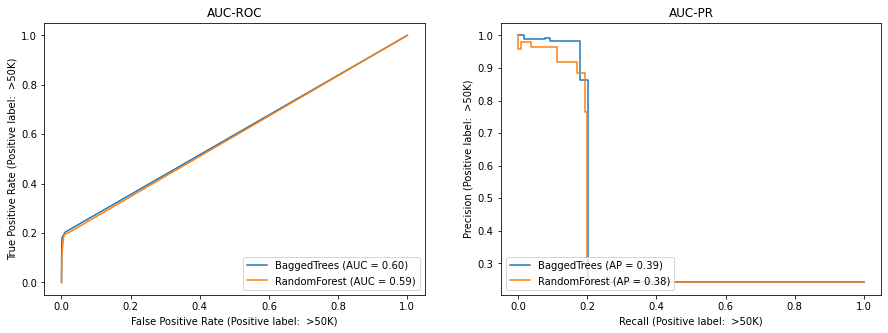

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
plot_roc_curve(bagg, X_test, y_test, ax=axs[0], name='BaggedTrees')
plot_roc_curve(rf, X_test, y_test, ax=axs[0], name='RandomForest')
plot_precision_recall_curve(bagg, X_test, y_test, ax=axs[1], name='BaggedTrees')
plot_precision_recall_curve(rf, X_test, y_test, ax=axs[1], name='RandomForest')
axs[0].set_title('AUC-ROC')
axs[1].set_title('AUC-PR')
plt.show()